In [1]:
import numpy as np
import matplotlib.pyplot as plt

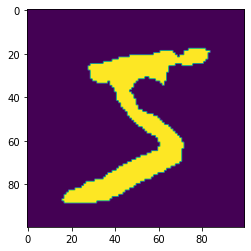

In [95]:
pix_size = 1.0e-6
width = 100
height = 100
z = 1.0e-3
wavelength = 633.0e-9
k = 2 * np.pi / wavelength

data = np.loadtxt("../Questions/data/5.csv")
plt.imshow(data)

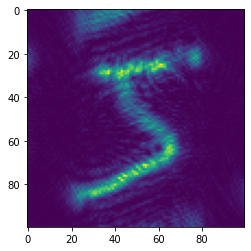

In [86]:
data_hoge = data.reshape([1,1,data.shape[0]*data.shape[1]])

sx = np.linspace(-pix_size*width/2, pix_size*width/2, width)
sy = np.linspace(-pix_size*height/2, pix_size*height/2, height)
Sx, Sy = np.meshgrid(sx, sy)

ux = np.linspace(-pix_size*width/2, pix_size*width/2, width)
uy = np.linspace(-pix_size*height/2, pix_size*height/2, height)
Ux, Uy = np.meshgrid(ux, uy)

dX = Sx.reshape([1,-1]) - Ux.reshape([-1, 1])
dY = Sy.reshape([1,-1]) - Uy.reshape([-1, 1])
R = np.sqrt(dX**2 + dY**2 + z**2)
R = R.reshape([width, height, -1])
H = data_hoge/(2*np.pi) * z/R * (1/R-1.0j*k) * np.exp(1.0j*k*R)/R
h = np.sum(H, axis=2)
plt.imshow(np.abs(h)**2/2)

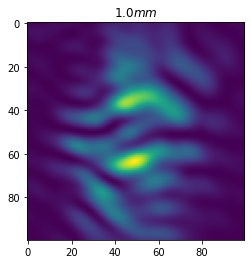

In [96]:
data_fuga = data.reshape([-1, 1])

sx = np.linspace(-pix_size*width/2, pix_size*width/2, width)
sy = np.linspace(-pix_size*height/2, pix_size*height/2, height)
Sx, Sy = np.meshgrid(sx, sy)

ux = np.linspace(-pix_size*width/2, pix_size*width/2, width)
uy = np.linspace(-pix_size*height/2, pix_size*height/2, height)
Ux, Uy = np.meshgrid(ux, uy)

dX = Sx.reshape([1,-1]) - Ux.reshape([-1, 1])
dY = Sy.reshape([1,-1]) - Uy.reshape([-1, 1])
R = np.sqrt(dX**2 + dY**2 + z**2)
H = 1/(2*np.pi) * z/R * (1/R-1.0j*k) * np.exp(1.0j*k*R)/R
h = H @ data_fuga
plt.imshow(np.abs(h.reshape([width, height]))**2/2)
plt.title(r"$1.0 mm$")
plt.savefig("../Questions/images/Q3_6.png")